### INTEGERATION OF PV POWER AND LOAD OUTPUT WITH EMS

#### PV POWER OUTPUT FORCAST USING THE BEST ALGORITHM (RANDOM FOREST REGRESSION)

In [1]:
import numpy as np
import pandas as pd

In [2]:
PV_dataset = pd.read_csv('PV_Dataset.csv')

In [3]:
PV_dataset['year'] = PV_dataset['time'].str[:4]
PV_dataset['month'] = PV_dataset['time'].str[4:6]
PV_dataset['day'] = PV_dataset['time'].str[6:8]
PV_dataset['hour_minute'] = PV_dataset['time'].str[9:]

In [4]:
PV_dataset = PV_dataset.drop(columns ='time', axis =1)

In [5]:
PV_dataset['hour_minute'] = PV_dataset['hour_minute'].str[:2]

In [6]:
PV_dataset = PV_dataset[(PV_dataset[['PV power', 'Direct-in-plane', 'Sun Height']] != 0).any(axis=1)]

In [7]:
PV_dataset['month'] = PV_dataset['month'].astype(int)
PV_dataset['day'] = PV_dataset['day'].astype(int)
PV_dataset['hour_minute'] = PV_dataset['hour_minute'].astype(int)

In [8]:
PV_dataset = PV_dataset.drop(columns ='year', axis =1)

In [9]:
PV_dataset.head()

,PV power,Direct-in-plane,Sun Height,Air Temperature,Wind speed,month,day,hour_minute
9,0.00,0.83,2.15,4.12,2.07,1,1,9
10,4.47,14.37,7.91,4.48,2.07,1,1,10
11,9.70,22.45,11.94,5.47,2.07,1,1,11
12,49.28,72.31,13.94,6.16,2.07,1,1,12
13,108.50,139.14,13.73,6.93,2.55,1,1,13


In [10]:
PV_dataset.columns

Index(['PV power', 'Direct-in-plane', 'Sun Height', 'Air Temperature',
       'Wind speed', 'month', 'day', 'hour_minute'],
      dtype='object')

In [11]:
X = PV_dataset.drop(columns = ['PV power'], axis= 1)
Y = PV_dataset['PV power']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 2)

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [15]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train,Y_train)

RandomForestRegressor()

In [16]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
     'min_samples_split': [2, 5], 
}

In [17]:
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5,  n_jobs=-1, verbose=2, scoring='accuracy')

In [18]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [19]:
best_params = grid_search.best_params_

In [20]:
best_model_rf = grid_search.best_estimator_

##### PV POWER OUTPUT PREDICTIVE MODEL

Input Values:
1. Direct-in-plane 
2. Sun Height
3. Air Temperature
4. 'WindSpeed
5. 'mont
6. day
7. 'hourminutet'

In [21]:
input_dataset = (22.45,11.94,5.47,2.07,1,1,11)
input_dataset_asarray = np.asarray(input_dataset)
input_data_reshape = input_dataset_asarray.reshape(1,-1)
predicted_pv = best_model_rf.predict(input_data_reshape)
print(f'The PV Power output is {predicted_pv}')

The PV Power output is [9.6744]


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#### LOAD FORCAST USING THE BEST ALGORITHM (LINEAR REGRESSION)

In [22]:
demand_dataset = pd.read_csv('hourly_dataset3.csv')

In [23]:
demand_dataset.columns

Index(['Discharge(Wh)', 'Charge(Wh)', 'Production(Wh)', 'Consumption(Wh)',
       'Feed-in(Wh)', 'From grid(Wh)', 'State of Charge(%)', 'Month', 'Day',
       'Hour'],
      dtype='object')

In [24]:
demand_dataset.head()

,Discharge(Wh),Charge(Wh),Production(Wh),Consumption(Wh),Feed-in(Wh),From grid(Wh),State of Charge(%),Month,Day,Hour
0,0.0,7.67,0.0,96.21,0.0,103.88,0.0,1,1,1
1,0.0,7.80,0.0,41.13,0.0,48.93,0.0,1,1,2
2,0.0,8.34,0.0,80.93,0.0,89.27,0.0,1,1,3
3,0.0,7.80,0.0,65.69,0.0,73.49,0.0,1,1,4
4,0.0,7.82,0.0,42.95,0.0,50.77,0.0,1,1,5


In [25]:
X = demand_dataset.drop(columns= 'Consumption(Wh)', axis=1)
Y = demand_dataset['Consumption(Wh)']

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 2)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model_lr = LinearRegression()
model_lr.fit(X_train,Y_train)

LinearRegression()

In [29]:
param_grid = {
    'fit_intercept': [True, False] 
}

In [30]:
grid_search = GridSearchCV(estimator=model_lr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

In [31]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [32]:
best_param = grid_search.best_params_

In [33]:
best_model_lr = grid_search.best_estimator_

##### CURRENT DEMAND OUTPUT PREDICTIVE MODEL

1. Discharge(Wh): discharge from the battery
2. Charge(Wh): charged into a battery
3. Production(Wh): amount of energy produce from the secondary source (household)
4. Consumption(Wh): amount of energy consumed by household
5. Feed-in(Wh): energy feed back into the grid
6. From grid(Wh): amount of energy drawn from the grid
7. state of charge(%): secondary battery life
8. Month, day, hour

In [34]:
input_dataset = (0.0,7.67,0.0,0.0,103.88,0.0,1,1,1)
input_dataset_asarray = np.asarray(input_dataset)
input_data_reshape = input_dataset_asarray.reshape(1,-1)
predicted_load = best_model_lr.predict(input_data_reshape)
print(f'The current demand  is {predicted_load}')

The current demand  is [96.16394804]


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### ENERGY MANAGEMENT SYSTEM MODEL 

In [35]:
def energy_management_system_24h(hourly_pv, hourly_demand, initial_storage, battery_capacity, grid_connected):
    current_storage = initial_storage  # Start with the given initial battery storage
    print(f"Simulation Start: Initial Storage = {current_storage} Kwh\n")
    
    for hour in range(24):
        predicted_pv = hourly_pv[hour]  # PV generation for the current hour
        current_demand = hourly_demand[hour]  # Demand for the current hour
        print(f"--- Hour {hour + 1} ---")
        print(f"Predicted PV Generation: {predicted_pv} Kwh, Current Demand: {current_demand} Kwh")
        
        # Check PV power generation
        if predicted_pv >= current_demand:
            # Excess energy generated
            excess_energy = predicted_pv - current_demand
            if current_storage + excess_energy <= battery_capacity:
                current_storage += excess_energy
                print(f"The PV power generation is more than the Current demand.\n"
                      f"Excess Energy {excess_energy:.2f} Kwh is added to the storage.\n"
                      f"Updated Storage: {current_storage:.2f} Kwh.")
            else:
                # Battery full, excess energy goes to grid
                print(f"Battery Full\nExcess Energy is sent to the grid.")
        else:
            # PV energy is insufficient to meet demand
            deficit = current_demand - predicted_pv
            if current_storage >= deficit:
                # Use battery storage to meet demand
                current_storage -= deficit
                print(f"The PV power generation is insufficient to meet demand.\n"
                      f"Discharging {deficit} Kwh from the battery.\n"
                      f"Remaining Storage: {current_storage:.2f} Kwh.")
            else:
                # Not enough storage, rely on the grid
                if grid_connected:
                    print(f"Not enough storage. Rely on the grid.\n"
                          f"Grid required to supply {deficit - current_storage:.2f} Kwh.\n"
                          f"Battery Depleted.")
                    current_storage = 0
                else:
                    print(f"Insufficient energy. Load shedding may be needed.\n"
                          f"Only {current_storage:.2f} Kwh is available.")
        print()  # Blank line for readability

    print("Simulation Complete\n")
    print(f"Final Battery Storage: {current_storage} Kwh")

In [36]:
hourly_pv = [0, 0, 0, 0, 50, 100, 200, 300, 450, 500, 500, 500, 500, 450, 400, 300, 300, 100, 50, 0, 0, 0, 0, 0]  # PV generation for each hour
hourly_demand = [400, 300, 200, 150, 150, 200, 250, 300, 300, 350, 350, 400, 400, 400, 350, 300, 500, 600, 700, 800, 850, 700, 600, 500]  # Demand for each hour
initial_storage = 200  # Starting storage in KWh
battery_capacity = 800  # Max battery capacity in kWh
grid_connected = True  # System connected to the grid

#### Run the 24-hour simulation

In [37]:
energy_management_system_24h(hourly_pv, hourly_demand, initial_storage, battery_capacity, grid_connected)

Simulation Start: Initial Storage = 200 Kwh

--- Hour 1 ---
Predicted PV Generation: 0 Kwh, Current Demand: 400 Kwh
Not enough storage. Rely on the grid.
Grid required to supply 200.00 Kwh.
Battery Depleted.

--- Hour 2 ---
Predicted PV Generation: 0 Kwh, Current Demand: 300 Kwh
Not enough storage. Rely on the grid.
Grid required to supply 300.00 Kwh.
Battery Depleted.

--- Hour 3 ---
Predicted PV Generation: 0 Kwh, Current Demand: 200 Kwh
Not enough storage. Rely on the grid.
Grid required to supply 200.00 Kwh.
Battery Depleted.

--- Hour 4 ---
Predicted PV Generation: 0 Kwh, Current Demand: 150 Kwh
Not enough storage. Rely on the grid.
Grid required to supply 150.00 Kwh.
Battery Depleted.

--- Hour 5 ---
Predicted PV Generation: 50 Kwh, Current Demand: 150 Kwh
Not enough storage. Rely on the grid.
Grid required to supply 100.00 Kwh.
Battery Depleted.

--- Hour 6 ---
Predicted PV Generation: 100 Kwh, Current Demand: 200 Kwh
Not enough storage. Rely on the grid.
Grid required to supply

In [38]:
import matplotlib.pyplot as plt

In [39]:
# Initialize variables
current_storage = initial_storage
storage_over_time = []  # To track battery storage over time
grid_usage = []  # Track grid usage for each hour
excess_energy = []  # Track excess energy sent to grid

# Run simulation
for hour in range(24):
    predicted_pv = hourly_pv[hour]  # PV generation for the current hour
    current_demand = hourly_demand[hour]  # Demand for the current hour
    grid_supply = 0  # Grid supply for the current hour
    excess_to_grid = 0  # Excess energy to grid for the current hour
    
    # Check PV power generation
    if predicted_pv >= current_demand:
        # Excess energy generated
        excess_energy_this_hour = predicted_pv - current_demand
        if current_storage + excess_energy_this_hour <= battery_capacity:
            current_storage += excess_energy_this_hour
        else:
            excess_to_grid = (current_storage + excess_energy_this_hour) - battery_capacity
            current_storage = battery_capacity
    else:
        # PV energy is insufficient to meet demand
        deficit = current_demand - predicted_pv
        if current_storage >= deficit:
            current_storage -= deficit
        else:
            grid_supply = deficit - current_storage
            current_storage = 0
    
    # Log results for this hour
    storage_over_time.append(current_storage)
    grid_usage.append(grid_supply)
    excess_energy.append(excess_to_grid)

In [40]:
print(storage_over_time, end ='')

[0, 0, 0, 0, 0, 0, 0, 0, 150, 300, 450, 550, 650, 700, 750, 750, 550, 50, 0, 0, 0, 0, 0, 0]

In [41]:
print(grid_usage, end ='')

[200, 300, 200, 150, 100, 100, 50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 600, 800, 850, 700, 600, 500]

In [42]:
print(excess_energy, end='')

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [43]:
hours = np.arange(1, 25)  # 1 to 24

In [44]:
data = {'hours': range(1,25),
        'hourly_pv(kwh)' : hourly_pv,
        'hourly_demand(kwh)' : hourly_demand,
        'storage_over_time(kwh)': storage_over_time,
        'grid_usage(kwh)': grid_usage, 
        'excess_energy(kwh)': excess_energy
       }

In [45]:
data_df = pd.DataFrame(data)
data_df

,hours,hourly_pv(kwh),hourly_demand(kwh),storage_over_time(kwh),grid_usage(kwh),excess_energy(kwh)
0,1,0,400,0,200,0
1,2,0,300,0,300,0
2,3,0,200,0,200,0
3,4,0,150,0,150,0
4,5,50,150,0,100,0
5,6,100,200,0,100,0
6,7,200,250,0,50,0
7,8,300,300,0,0,0
8,9,450,300,150,0,0
9,10,500,350,300,0,0


##### Battery storage over time

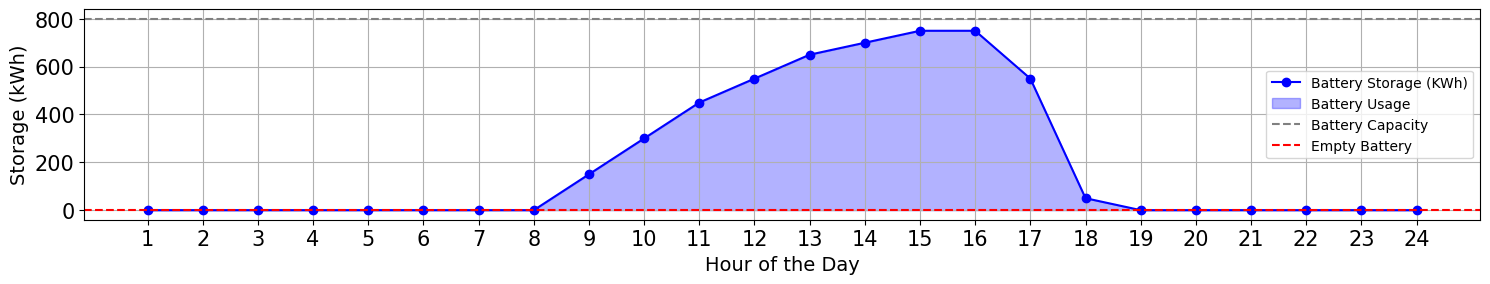

In [46]:
plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
plt.plot(hours, storage_over_time, label="Battery Storage (KWh)", marker="o", color="blue")
plt.fill_between(hours, storage_over_time, color='blue', alpha=0.3, label="Battery Usage")
plt.axhline(y=battery_capacity, color='gray', linestyle='--', label="Battery Capacity")
plt.axhline(y=0, color='red', linestyle='--', label="Empty Battery")
#plt.title("Battery Storage Over 24 Hours")
plt.ylabel("Storage (kWh)", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=14)
plt.xticks(hours, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

##### Grid usage over time

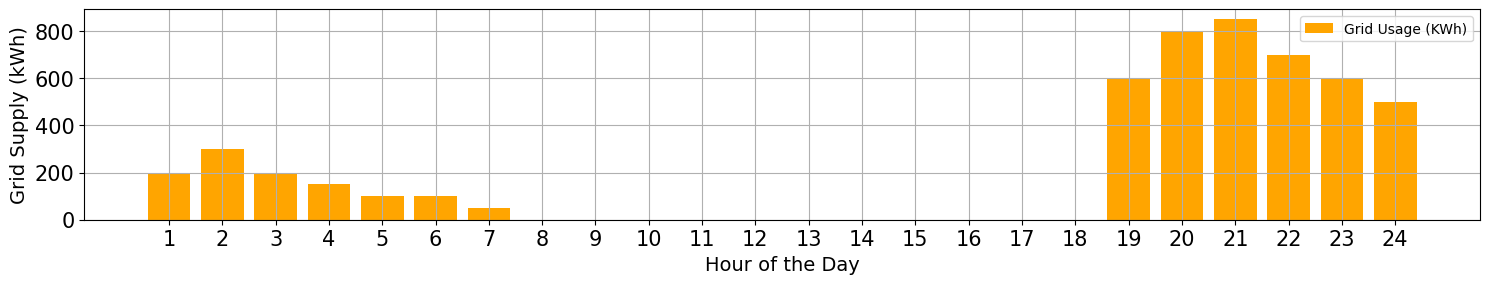

In [47]:
plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 2)
plt.bar(hours, grid_usage, label="Grid Usage (KWh)", color="orange")
#plt.title("Grid Usage Over 24 Hours without the battery")
plt.ylabel("Grid Supply (kWh)", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=14)
plt.xticks(hours, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

##### Excess energy sent to grid over time

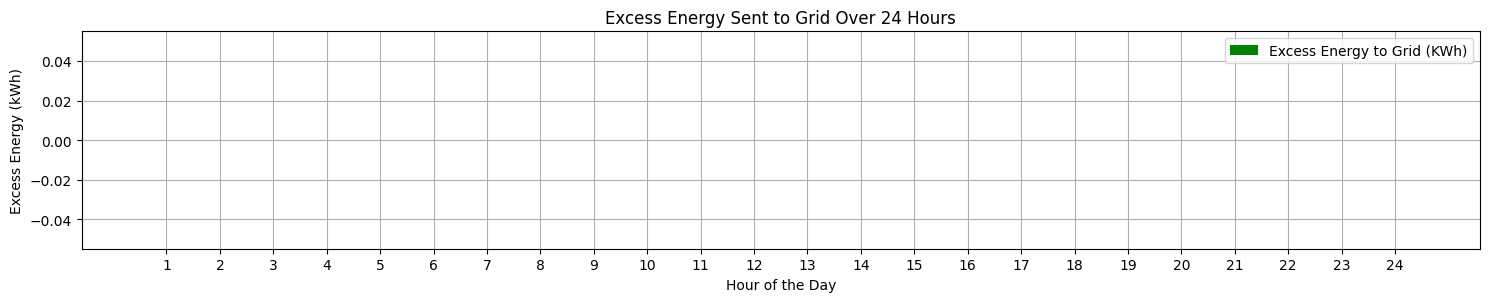

In [48]:
plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 3)
plt.bar(hours, excess_energy, label="Excess Energy to Grid (KWh)", color="green")
plt.title("Excess Energy Sent to Grid Over 24 Hours")
plt.ylabel("Excess Energy (kWh)")
plt.xlabel("Hour of the Day")
plt.xticks(hours)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [49]:
# Define the tariff rates (in cents per kWh)
peak_rate = 27.65
day_rate = 25.92
night_rate = 13.62

# Function to determine the rate based on the hour of the day
def get_rate(hour):
    if 17 <= hour < 19:  # Peak hours (5 PM - 7 PM)
        return peak_rate
    elif 8 <= hour < 17 or 19 <= hour < 23:  # Day hours (8 AM - 4 PM & 7 PM - 11 PM)
        return day_rate
    else:  # Night hours (11 PM - 8 AM)
        return night_rate

# Apply the function to determine the rate for each row
data_df["Rate (cents/kWh)"] = data_df["hours"].apply(get_rate)

data_df['TOU Tariff(cent)'] = data_df["Rate (cents/kWh)"] * data_df['hourly_demand(kwh)']

In [50]:
data_df.to_csv('result2.csv', index= False)

In [51]:
import pandas as pd
import numpy as np
import random
import csv

# Load the data
df = pd.read_csv('result2.csv')

# Extract columns
grid_usage = df['grid_usage(kwh)'].to_numpy()
# Note: 'TOU Tariff(cent)' column name might have spaces; ensure we use the exact header
tou_tariff = df['TOU Tariff(cent)'].to_numpy()

# Define fitness function: lower cost is better
# Here cost = sum( (grid_usage * m_grid) * (tou_tariff * m_tou) )
# We want to minimize this cost.

def fitness(individual):
    m_grid, m_tou = individual
    cost = np.sum((grid_usage * m_grid) * (tou_tariff * m_tou))
    return cost

# GA parameters
POP_SIZE = 50
GENERATIONS = 100
MUTATION_RATE = 0.2
CROSSOVER_RATE = 0.7

# Bounds for multipliers
LOWER_BOUND = 0.5
UPPER_BOUND = 1.0

# Initialize population: list of individuals, each individual is a list [m_grid, m_tou]
def init_population(size):
    return [[random.uniform(LOWER_BOUND, UPPER_BOUND), random.uniform(LOWER_BOUND, UPPER_BOUND)] for _ in range(size)]

# Tournament selection: select the best from randomly chosen individuals

def tournament_selection(pop, k=3):
    selected = random.sample(pop, k)
    selected.sort(key=lambda ind: fitness(ind))
    return selected[0]

# Crossover: simple arithmetic crossover

def crossover(parent1, parent2):
    if random.random() < CROSSOVER_RATE:
        alpha = random.random()
        child1 = [alpha*parent1[0] + (1-alpha)*parent2[0], alpha*parent1[1] + (1-alpha)*parent2[1]]
        child2 = [alpha*parent2[0] + (1-alpha)*parent1[0], alpha*parent2[1] + (1-alpha)*parent1[1]]
        return child1, child2
    else:
        return parent1, parent2

# Mutation: add a small random change to each parameter

def mutate(individual):
    if random.random() < MUTATION_RATE:
        individual[0] += random.uniform

In [52]:
!pip install tqdm

Genetic Algorithm Progress: 100%|██████████| 100/100 [00:00<00:00, 615.04it/s]


Best solution found:
Grid usage multiplier: 0.5000
TOU tariff multiplier: 0.5000
Optimized cost: 17756250.00
Original cost: 71025000.00
Cost reduction: 75.00%


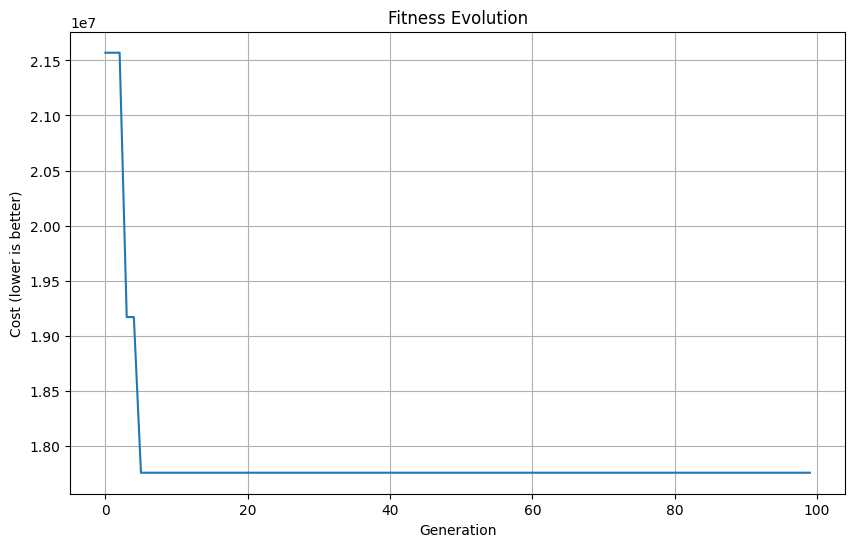

Optimized data saved to 'optimized_energy_usage.csv'
Optimized Data Sample:
   hours  hourly_pv(kwh)  hourly_demand(kwh)  storage_over_time(kwh)  \
0      1               0                 400                       0   
1      2               0                 300                       0   
2      3               0                 200                       0   
3      4               0                 150                       0   
4      5              50                 150                       0   

   grid_usage(kwh)  excess_energy(kwh)  Rate (cents/kWh)  TOU Tariff(cent)  \
0              200                   0             13.62            5448.0   
1              300                   0             13.62            4086.0   
2              200                   0             13.62            2724.0   
3              150                   0             13.62            2043.0   
4              100                   0             13.62            2043.0   

   optimized_grid_usag

In [53]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load the data
df = pd.read_csv('result2.csv')

# Extract columns
grid_usage = df['grid_usage(kwh)'].to_numpy()
# Note: 'TOU Tariff(cent)' column name might have spaces; ensure we use the exact header
tou_tariff = df['TOU Tariff(cent)'].to_numpy()

# Define fitness function: lower cost is better
# Here cost = sum( (grid_usage * m_grid) * (tou_tariff * m_tou) )
# We want to minimize this cost.

def fitness(individual):
    m_grid, m_tou = individual
    cost = np.sum((grid_usage * m_grid) * (tou_tariff * m_tou))
    return cost

# GA parameters
POP_SIZE = 50
GENERATIONS = 100
MUTATION_RATE = 0.2
CROSSOVER_RATE = 0.7

# Bounds for multipliers
LOWER_BOUND = 0.5
UPPER_BOUND = 1.0

# Initialize population: list of individuals, each individual is a list [m_grid, m_tou]
def init_population(size):
    return [[random.uniform(LOWER_BOUND, UPPER_BOUND), random.uniform(LOWER_BOUND, UPPER_BOUND)] for _ in range(size)]

# Tournament selection: select the best from randomly chosen individuals
def tournament_selection(pop, k=3):
    selected = random.sample(pop, k)
    selected.sort(key=lambda ind: fitness(ind))
    return selected[0]

# Crossover: simple arithmetic crossover
def crossover(parent1, parent2):
    if random.random() < CROSSOVER_RATE:
        alpha = random.random()
        child1 = [alpha*parent1[0] + (1-alpha)*parent2[0], alpha*parent1[1] + (1-alpha)*parent2[1]]
        child2 = [alpha*parent2[0] + (1-alpha)*parent1[0], alpha*parent2[1] + (1-alpha)*parent1[1]]
        return child1, child2
    else:
        return parent1, parent2

# Mutation: add a small random change to each parameter
def mutate(individual):
    if random.random() < MUTATION_RATE:
        individual[0] += random.uniform(-0.1, 0.1)
        individual[0] = max(LOWER_BOUND, min(UPPER_BOUND, individual[0]))
    if random.random() < MUTATION_RATE:
        individual[1] += random.uniform(-0.1, 0.1)
        individual[1] = max(LOWER_BOUND, min(UPPER_BOUND, individual[1]))
    return individual

# Main GA loop
def genetic_algorithm():
    # Initialize population
    population = init_population(POP_SIZE)
    
    # Track best fitness over generations
    best_fitness_history = []
    best_individual_history = []
    
    # Evolution loop
    for gen in tqdm(range(GENERATIONS), desc="Genetic Algorithm Progress"):
        # Evaluate fitness for all individuals
        fitness_values = [fitness(ind) for ind in population]
        
        # Find the best individual
        best_idx = np.argmin(fitness_values)
        best_individual = population[best_idx]
        best_fitness = fitness_values[best_idx]
        
        # Store history
        best_fitness_history.append(best_fitness)
        best_individual_history.append(best_individual.copy())
        
        # Create new population
        new_population = []
        
        # Elitism: keep the best individual
        new_population.append(best_individual)
        
        # Fill the rest of the population
        while len(new_population) < POP_SIZE:
            # Selection
            parent1 = tournament_selection(population)
            parent2 = tournament_selection(population)
            
            # Crossover
            child1, child2 = crossover(parent1, parent2)
            
            # Mutation
            child1 = mutate(child1)
            child2 = mutate(child2)
            
            # Add to new population
            new_population.append(child1)
            if len(new_population) < POP_SIZE:
                new_population.append(child2)
        
        # Replace old population
        population = new_population
    
    # Return the best individual and fitness history
    return best_individual_history[-1], best_fitness_history

# Run the GA
best_solution, fitness_history = genetic_algorithm()

# Print results
print("Best solution found:")
print(f"Grid usage multiplier: {best_solution[0]:.4f}")
print(f"TOU tariff multiplier: {best_solution[1]:.4f}")
print(f"Optimized cost: {fitness(best_solution):.2f}")
print(f"Original cost: {fitness([1.0, 1.0]):.2f}")
print(f"Cost reduction: {(1 - fitness(best_solution)/fitness([1.0, 1.0])) * 100:.2f}%")

# Plot fitness history
plt.figure(figsize=(10, 6))
plt.plot(fitness_history)
plt.title('Fitness Evolution')
plt.xlabel('Generation')
plt.ylabel('Cost (lower is better)')
plt.grid(True)
plt.show()

# Create optimized data
optimized_df = df.copy()
optimized_df['optimized_grid_usage'] = df['grid_usage(kwh)'] * best_solution[0]
optimized_df['optimized_tou_tariff'] = df['TOU Tariff(cent)'] * best_solution[1]
optimized_df['original_cost'] = df['grid_usage(kwh)'] * df['TOU Tariff(cent)']
optimized_df['optimized_cost'] = optimized_df['optimized_grid_usage'] * optimized_df['optimized_tou_tariff']

# Save to CSV
optimized_df.to_csv('optimized_energy_usage.csv', index=False)

print("Optimized data saved to 'optimized_energy_usage.csv'")

# Display the first few rows of the optimized data
print("\
Optimized Data Sample:")
print(optimized_df.head())

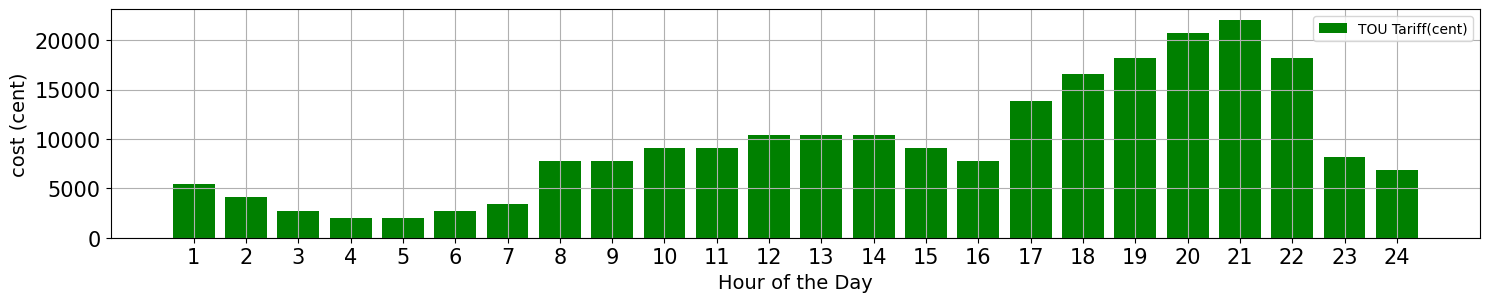

In [54]:
plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 3)
plt.bar(hours, df['TOU Tariff(cent)'], label="TOU Tariff(cent)", color="green")
#plt.title("Time of Used Tariff Over 24 Hours")
plt.ylabel("cost (cent)", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=14)
plt.xticks(hours, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

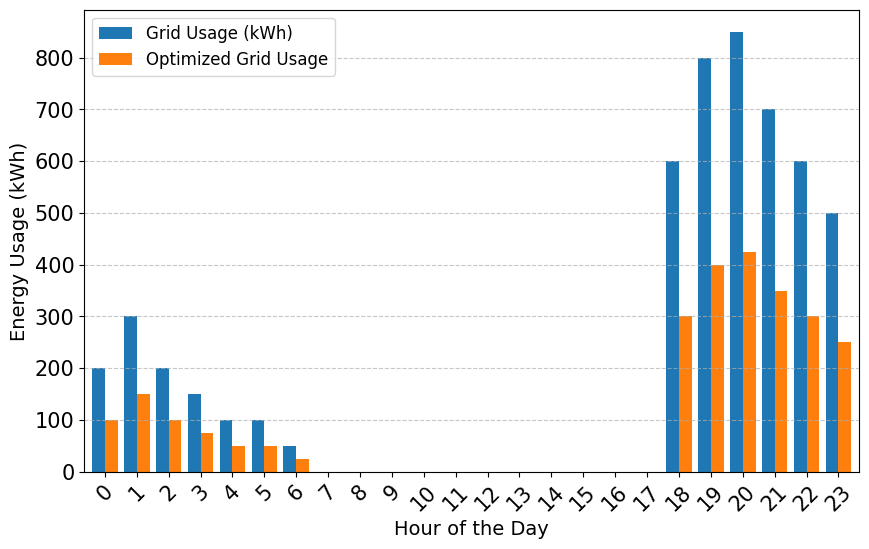

In [57]:
import matplotlib.pyplot as plt

# Set a larger figure size
plt.figure(figsize=(10, 6))  # Increased size

# Plot bar graph
optimized_df[['grid_usage(kwh)', 'optimized_grid_usage']].plot(kind='bar', width=0.8, figsize=(10, 6))

plt.xlabel("Hour of the Day", fontsize=14)
plt.ylabel("Energy Usage (kWh)", fontsize=14)
#plt.title("Comparison of Grid Usage and Optimized Grid Usage", fontsize=16)
plt.legend(["Grid Usage (kWh)", "Optimized Grid Usage"], fontsize=12)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


<Figure size 1000x600 with 0 Axes>

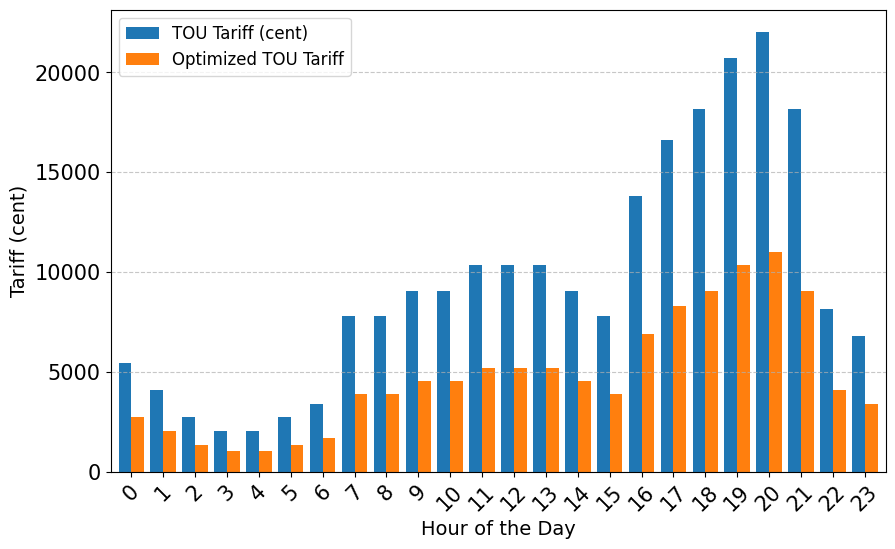

In [58]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 6))

# Plot bar graph
optimized_df[['TOU Tariff(cent)', 'optimized_tou_tariff']].plot(kind='bar', width=0.8, figsize=(10, 6))

# Labels and title
plt.xlabel("Hour of the Day", fontsize=14)
plt.ylabel("Tariff (cent)", fontsize=14)
#plt.title("Comparison of TOU Tariff and Optimized TOU Tariff", fontsize=16)
plt.legend(["TOU Tariff (cent)", "Optimized TOU Tariff"], fontsize=12)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()
